<a href="https://colab.research.google.com/github/vishnupradeesh/Machine_Learning/blob/main/DAY_NIGHT_IMAGE_CLASSIFICATION_USING_HISTOGRAM_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


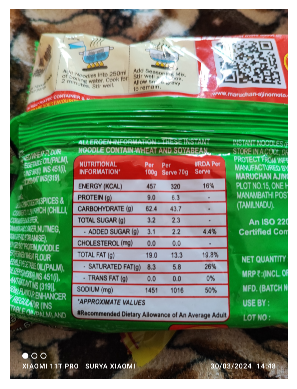

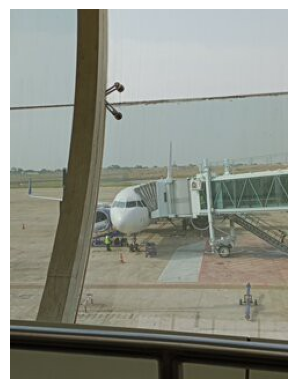

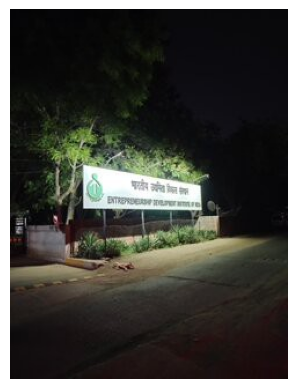

In [ ]:
product_img = '/content/drive/MyDrive/Colab Notebooks/PRODUCT.jpg'
day_img = '/content/drive/MyDrive/PRODUCT INGRDIENT DEEP LEARNING/DAY.jpg'
night_img = '/content/drive/MyDrive/PRODUCT INGRDIENT DEEP LEARNING/NIGHT.jpg'


def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off') # Hide axes
        plt.show()
        return img
    except FileNotFoundError:
      print(f"Error: Image file not found at {image_path}")
    except Exception as e:
      print(f"An error occurred: {e}")

main_product = load_and_preprocess_image(product_img)
main_day = load_and_preprocess_image(day_img)
main_night = load_and_preprocess_image(night_img)

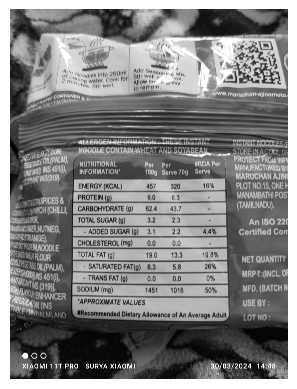

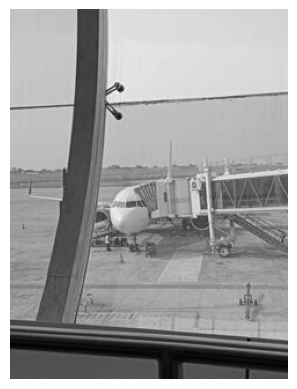

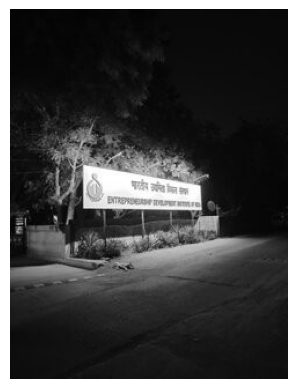

In [ ]:
# prompt: convert the image to grayy scale
def convert_to_grayscale(img):
  img_gray = img.convert("L")
  plt.imshow(img_gray, cmap='gray')
  plt.axis('off')
  plt.show()
  return img_gray

gray_product = convert_to_grayscale(main_product)
gray_day = convert_to_grayscale(main_day)
gray_night = convert_to_grayscale(main_night)

In [ ]:
def convert_to_matrix(img):
  img = np.array(img)
  img.shape
  return img

product_matrix = convert_to_matrix(gray_product)
day_matrix = convert_to_matrix(gray_day)
night_matrix = convert_to_matrix(gray_night)

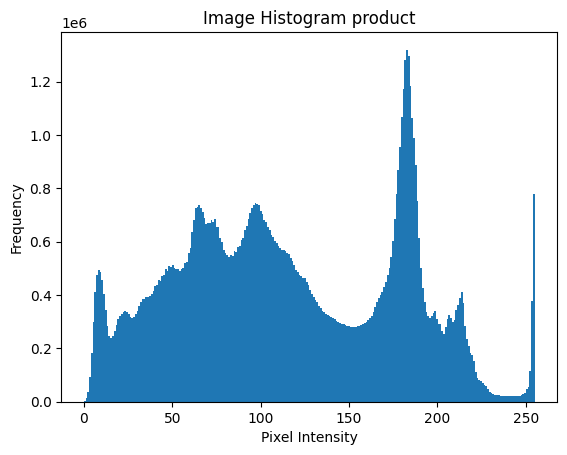

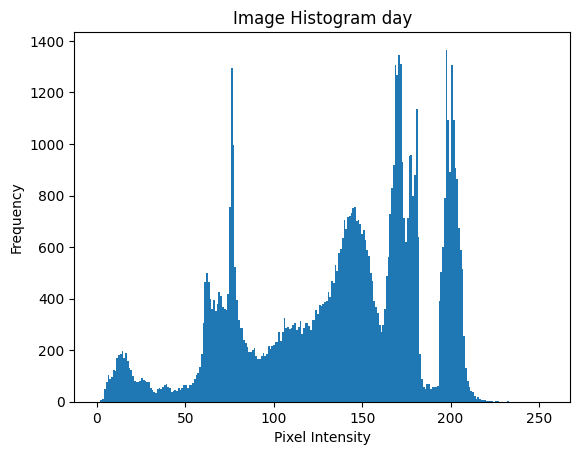

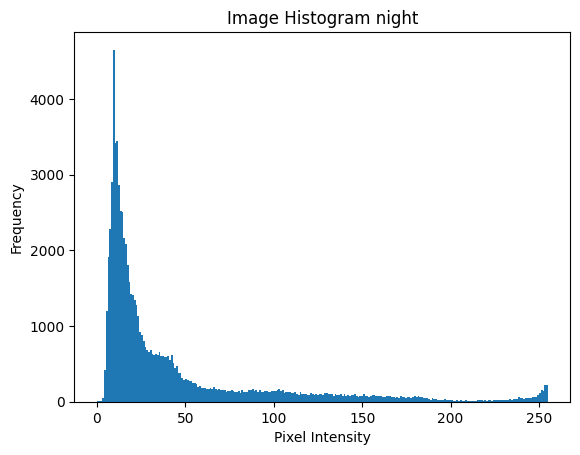

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
def show_matrix(matrix, name="NULL"):
  plt.hist(matrix.flatten(), bins=256, range=(0, 255))
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")
  plt.title("Image Histogram "+name)
  plt.show()
  return plt

show_matrix(product_matrix, "product")
show_matrix(day_matrix, "day")
show_matrix(night_matrix, "night")


In [ ]:
# --- 1. Load image and extract brightness histogram features ---
def extract_brightness_features(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the histogram (intensity values 0-255)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    # Use basic statistical features from the histogram
    mean = np.mean(hist)
    std = np.std(hist)
    skewness = np.sum((np.arange(256) - mean) ** 3 * hist) / (std ** 3 + 1e-7)

    return [mean, std, skewness]

# --- 2. Load your dataset ---
def load_dataset(folder_path):
    X = []
    y = []

    for label in ['day', 'night']:
        full_path = os.path.join(folder_path, label)
        for filename in os.listdir(full_path):
            if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                features = extract_brightness_features(os.path.join(full_path, filename))
                X.append(features)
                y.append(0 if label == 'day' else 1)  # 0 = day, 1 = night
    return np.array(X), np.array(y)

# --- 3. Train the classifier ---
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return clf

# --- 4. Predict on new image ---
def predict_image(clf, image_path):
    features = extract_brightness_features(image_path)
    prediction = clf.predict([features])[0]
    print("Prediction:", "Day" if prediction == 0 else "Night")

# --- Run the pipeline ---
# Make sure you have a dataset folder with subfolders 'day' and 'night' containing images
folder_path = "your_dataset_folder"  # 👈 Replace this with the path to your image dataset
X, y = load_dataset(folder_path)
clf = train_model(X, y)

# Predict on a new image
predict_image(clf, "test_image.jpg")  # 👈 Replace with your test image path
